### Taking the order features part of the WALS data, we check what PCA and MCS show us with R

In [1]:
datraw <- read.csv("order-features-matrix.csv")
summary(datraw)

       X         word_order3          issov             isvso        
 aab    :   1   Min.   :-1.0000   Min.   :-1.0000   Min.   :-1.0000  
 abi    :   1   1st Qu.: 1.0000   1st Qu.:-1.0000   1st Qu.:-1.0000  
 abk    :   1   Median : 1.0000   Median :-1.0000   Median :-1.0000  
 abn    :   1   Mean   : 0.8661   Mean   :-0.1932   Mean   :-0.8492  
 abo    :   1   3rd Qu.: 1.0000   3rd Qu.: 1.0000   3rd Qu.:-1.0000  
 abu    :   1   Max.   : 1.0000   Max.   : 1.0000   Max.   : 1.0000  
 (Other):1174                                                        
  word_order2       word_order1          isovs          adj_noun_adj    
 Min.   :-1.0000   Min.   :-1.0000   Min.   :-1.0000   Min.   :-1.0000  
 1st Qu.: 1.0000   1st Qu.: 1.0000   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median : 1.0000   Median : 1.0000   Median :-1.0000   Median :-1.0000  
 Mean   : 0.8525   Mean   : 0.7475   Mean   :-0.9644   Mean   :-0.8661  
 3rd Qu.: 1.0000   3rd Qu.: 1.0000   3rd Qu.:-1.0000   3rd Qu.:-1.0000  
 M

In [2]:
dat <- datraw[2:dim(datraw)[2]]
pca <- prcomp(dat,center = TRUE,scale. = TRUE)
summary(pca)

Importance of components:
                         PC1    PC2    PC3    PC4    PC5    PC6     PC7     PC8
Standard deviation     1.759 1.5480 1.4491 1.3428 1.2770 1.1355 1.00222 0.69232
Proportion of Variance 0.221 0.1712 0.1500 0.1288 0.1165 0.0921 0.07175 0.03424
Cumulative Proportion  0.221 0.3922 0.5422 0.6710 0.7874 0.8795 0.95129 0.98552
                           PC9    PC10    PC11      PC12      PC13      PC14
Standard deviation     0.42891 0.09818 0.09530 9.575e-15 5.139e-15 2.416e-15
Proportion of Variance 0.01314 0.00069 0.00065 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  0.99866 0.99935 1.00000 1.000e+00 1.000e+00 1.000e+00

Loading required package: ggplot2
Loading required package: plyr
Loading required package: scales
Loading required package: grid


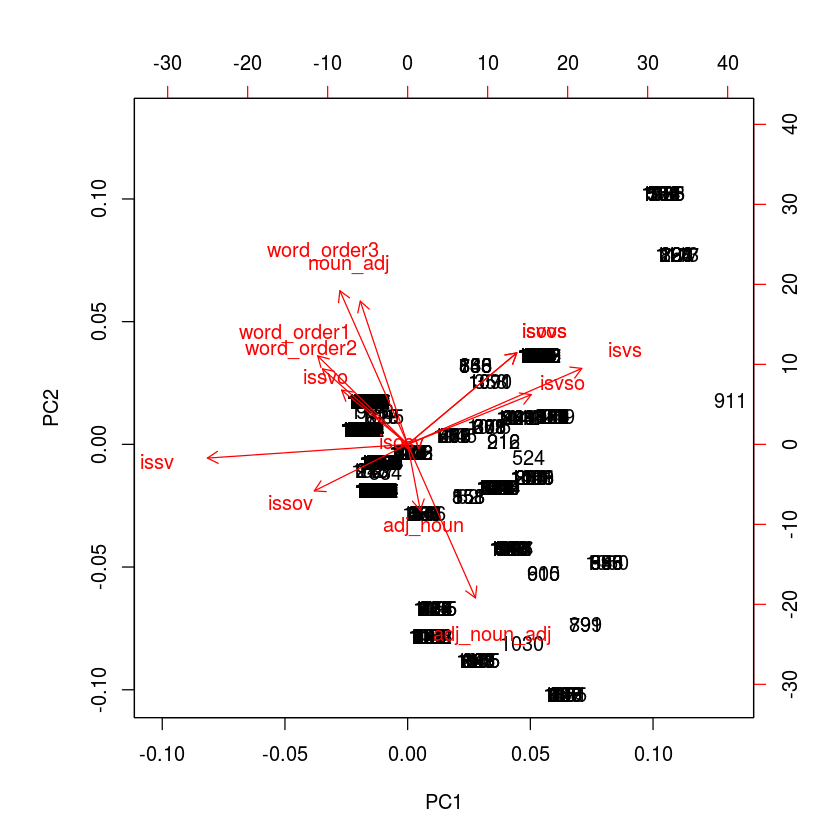

In [3]:
library(ggbiplot)
biplot(pca)

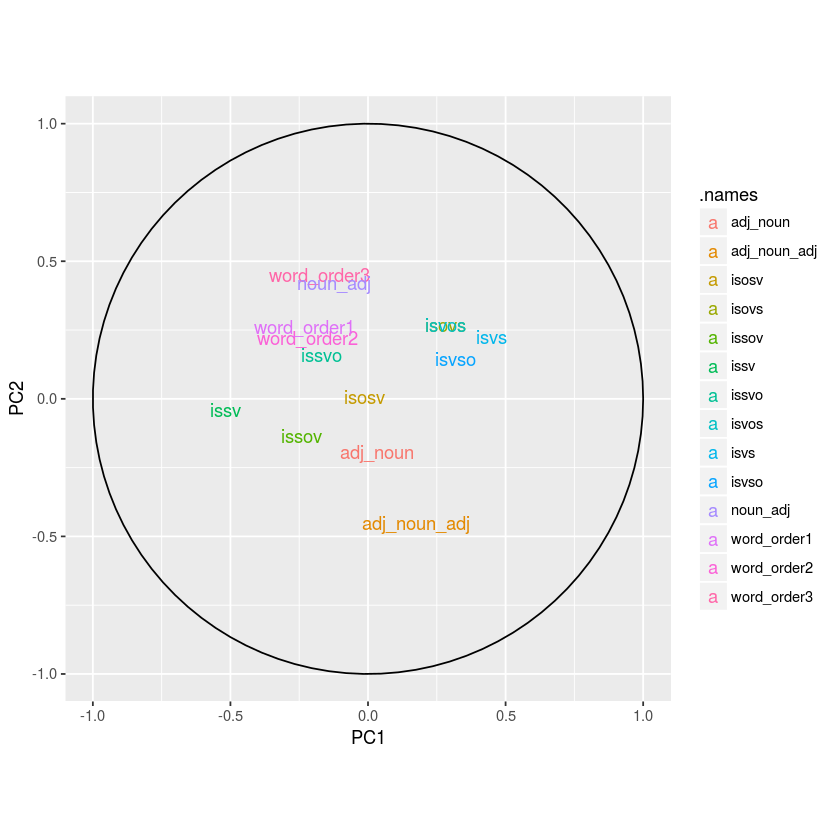

In [17]:
library(ggplot2)
theta <- seq(0,2*pi,length.out = 100)
circle <- data.frame(x = cos(theta), y = sin(theta))
p <- ggplot(circle,aes(x,y)) + geom_path()
loadings <- data.frame(pca$rotation, .names = row.names(pca$rotation))
p + geom_text(data=loadings, mapping=aes(x = PC1, y = PC2, label = .names, colour = .names)) + coord_fixed(ratio=1) +
labs(x = "PC1", y = "PC2")

In [147]:
library(FactoMineR)
chardat = apply(t(dat),1,function(x) as.character(x))
cats = apply(dat, 2, function(x) nlevels(as.factor(x)))

In [148]:
cats

word_order3        issov        isvso  word_order2  word_order1        isovs 
           2            2            2            2            2            2 
adj_noun_adj        isvos         isvs        issvo         issv     adj_noun 
           2            2            2            2            2            2 
       isosv     noun_adj 
           2            2

In [149]:
dim(chardat)
mca = MCA(chardat,graph=FALSE)

[1] 1180   14

In [150]:
mca$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,2.210254e-01,2.210254e+01,22.10254
dim 2,1.711645e-01,1.711645e+01,39.21900
dim 3,1.499924e-01,1.499924e+01,54.21824
dim 4,1.287851e-01,1.287851e+01,67.09675
dim 5,1.164739e-01,1.164739e+01,78.74414
dim 6,9.209829e-02,9.209829e+00,87.95397
dim 7,7.174631e-02,7.174631e+00,95.12860
dim 8,3.423635e-02,3.423635e+00,98.55224
dim 9,1.314036e-02,1.314036e+00,99.86627
dim 10,6.885312e-04,6.885312e-02,99.93512


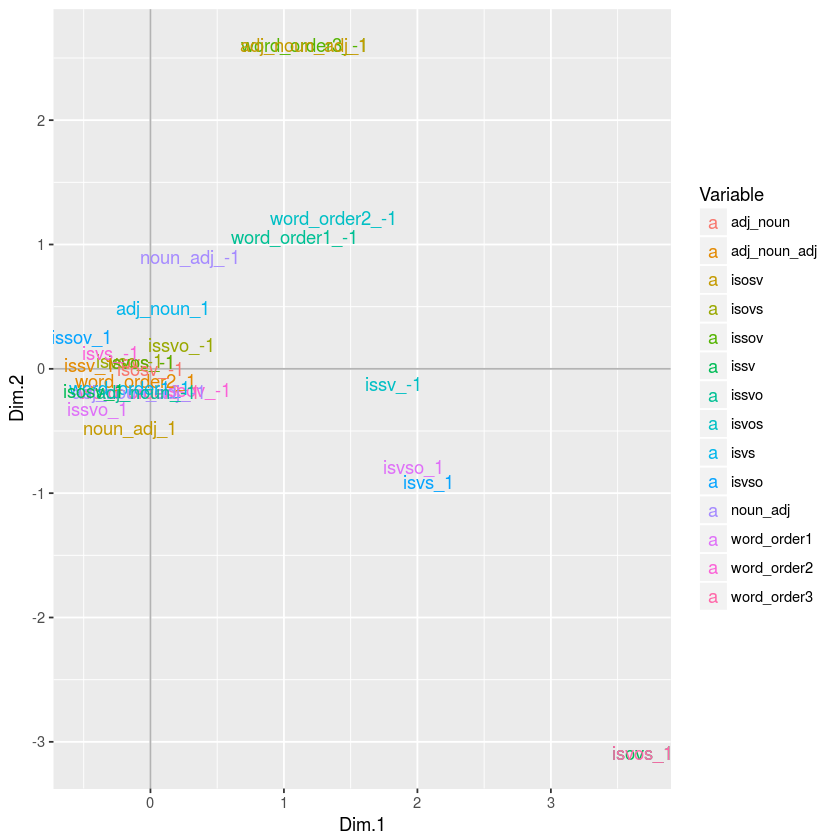

In [151]:
mca_vars_df = data.frame(mca$var$coord, Variable = rep(names(cats)), cats)

# data frame with observation coordinates
mca_obs_df = data.frame(mca$ind$coord)

# plot of variable categories
ggplot(data=mca_vars_df, 
       aes(x = Dim.1, y = Dim.2, label = rownames(mca_vars_df))) +
 geom_hline(yintercept = 0, colour = "gray70") +
 geom_vline(xintercept = 0, colour = "gray70") +
 geom_text(aes(colour=Variable))

In [152]:
mca

**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 1180 individuals, described by 14 variables
*The results are available in the following objects:

   name              description                       
1  "$eig"            "eigenvalues"                     
2  "$var"            "results for the variables"       
3  "$var$coord"      "coord. of the categories"        
4  "$var$cos2"       "cos2 for the categories"         
5  "$var$contrib"    "contributions of the categories" 
6  "$var$v.test"     "v-test for the categories"       
7  "$ind"            "results for the individuals"     
8  "$ind$coord"      "coord. for the individuals"      
9  "$ind$cos2"       "cos2 for the individuals"        
10 "$ind$contrib"    "contributions of the individuals"
11 "$call"           "intermediate results"            
12 "$call$marge.col" "weights of columns"              
13 "$call$marge.li"  "weights of rows"                 

In [153]:
mca$var$contrib

,Dim 1,Dim 2,Dim 3,Dim 4,Dim 5
word_order3_1,2.057470e-01,1.363723e+00,1.567465e-01,1.191146e+00,1.678561e-01
word_order3_-1,2.867437e+00,1.900581e+01,2.184530e+00,1.660065e+01,2.339361e+00
issov_1,3.474542e+00,1.115916e+00,1.165490e+01,1.788282e-02,6.750344e-01
issov_-1,2.349264e+00,7.545115e-01,7.880301e+00,1.209123e-02,4.564153e-01
isvso_1,9.443300e+00,1.970654e+00,7.945446e-02,3.086905e+00,2.739341e+01
isvso_-1,7.703517e-01,1.607591e-01,6.481620e-03,2.518190e-01,2.234660e+00
word_order2_1,3.578622e-01,3.627276e-01,3.317030e-01,6.685038e-01,1.289097e+00
word_order2_-1,4.495901e+00,4.557026e+00,4.167258e+00,8.398559e+00,1.619521e+01
word_order1_1,6.829185e-01,8.521374e-01,4.369743e-01,9.432748e-01,1.760221e+00
word_order1_-1,4.725429e+00,5.896333e+00,3.023628e+00,6.526955e+00,1.217978e+01


### MCA on Dense Matrix With Raw Feature Values

In [168]:
datraw2 <- read.csv("raw-complete-107x6.csv")
dat2 <- datraw2[2:dim(datraw2)[2]]
dat2 <- apply(dat2,2,function(x) as.character(x))
cats2 <- apply(dat2, 2, function(x) nlevels(as.factor(x)))
mca2 <- MCA(dat2,graph=FALSE)
mca2$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.518371681,14.81061945,14.81062
dim 2,0.350507939,10.01451253,24.82513
dim 3,0.324983951,9.28525575,34.11039
dim 4,0.288126801,8.23219431,42.34258
dim 5,0.270414719,7.72613483,50.06872
dim 6,0.238293762,6.80839319,56.87711
dim 7,0.216566828,6.18762366,63.06473
dim 8,0.193155148,5.51871853,68.58345
dim 9,0.175545891,5.01559689,73.59905
dim 10,0.169784399,4.85098284,78.45003


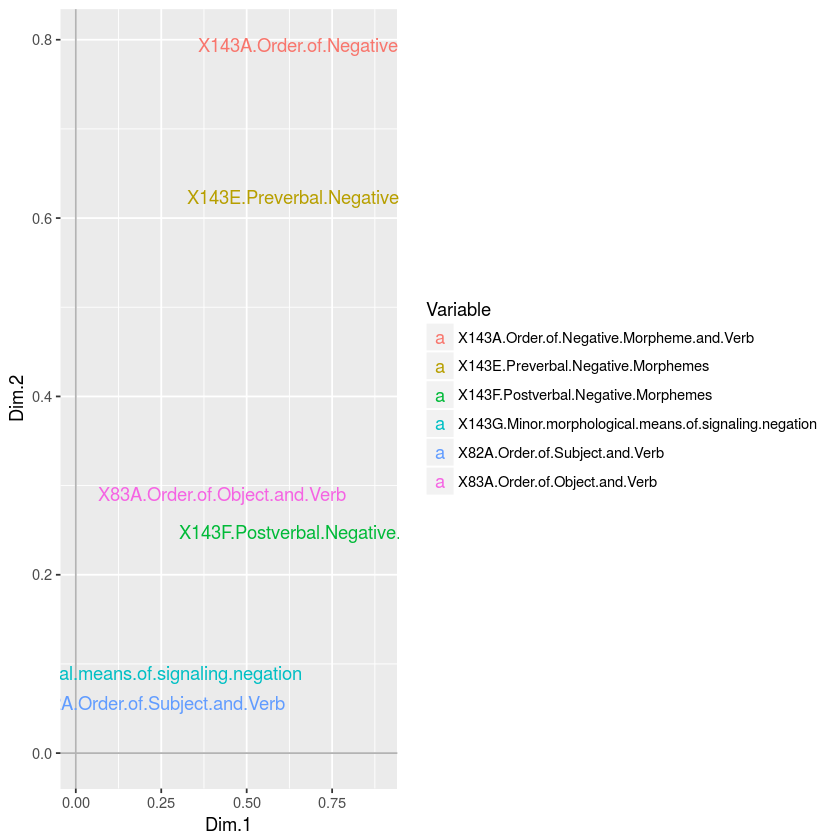

In [175]:
df2 <- data.frame(mca2$var$eta2, Variable = rep(names(cats2)), cats2)
ggplot(data=df2, 
       aes(x = Dim.1, y = Dim.2, label = rownames(df2))) +
 geom_hline(yintercept = 0, colour = "gray70") +
 geom_vline(xintercept = 0, colour = "gray70") +
 geom_text(aes(colour=Variable))

In [171]:
datraw3 <- read.csv("five-diversex107.csv")
dat3 <- datraw3[2:dim(datraw3)[2]]
cats3 <- apply(dat3, 2, function(x) nlevels(as.factor(x)))
mca3 <- MCA(dat3,graph=FALSE)
mca3$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.40272693,16.780289,16.78029
dim 2,0.30159962,12.566651,29.34694
dim 3,0.23805605,9.919002,39.26594
dim 4,0.21556160,8.981733,48.24768
dim 5,0.20930821,8.721176,56.96885
dim 6,0.20108445,8.378519,65.34737
dim 7,0.20042925,8.351219,73.69859
dim 8,0.18451588,7.688161,81.38675
dim 9,0.16511827,6.879928,88.26668
dim 10,0.12571281,5.238034,93.50471


In [173]:
mca3

**Results of the Multiple Correspondence Analysis (MCA)**
The analysis was performed on 107 individuals, described by 5 variables
*The results are available in the following objects:

   name              description                       
1  "$eig"            "eigenvalues"                     
2  "$var"            "results for the variables"       
3  "$var$coord"      "coord. of the categories"        
4  "$var$cos2"       "cos2 for the categories"         
5  "$var$contrib"    "contributions of the categories" 
6  "$var$v.test"     "v-test for the categories"       
7  "$ind"            "results for the individuals"     
8  "$ind$coord"      "coord. for the individuals"      
9  "$ind$cos2"       "cos2 for the individuals"        
10 "$ind$contrib"    "contributions of the individuals"
11 "$call"           "intermediate results"            
12 "$call$marge.col" "weights of columns"              
13 "$call$marge.li"  "weights of rows"                 

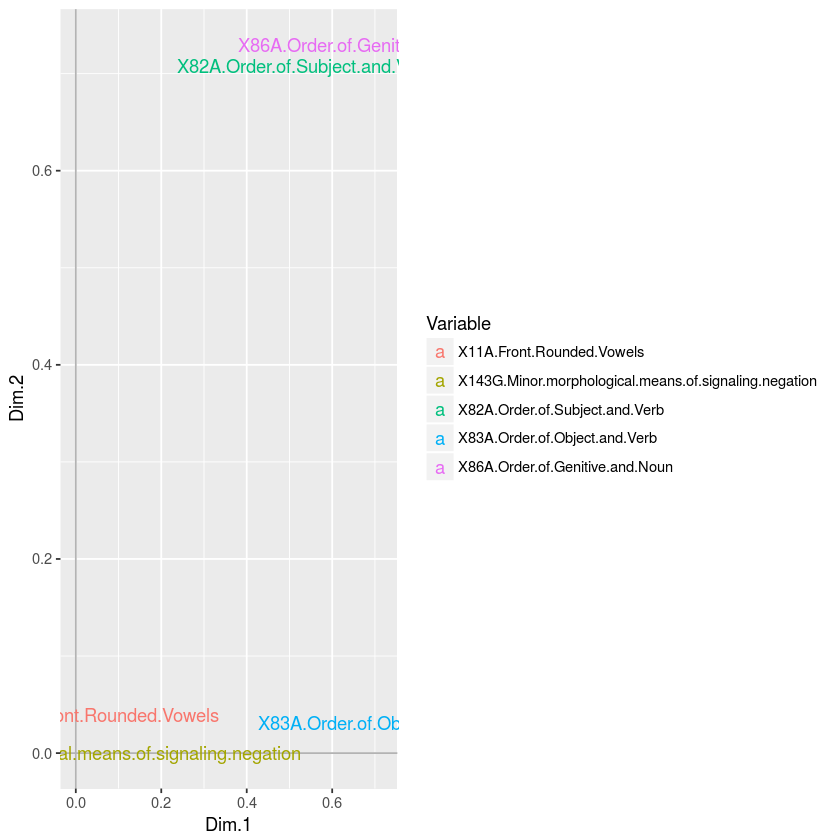

In [177]:
df3 <- data.frame(mca3$var$eta2, Variable = rep(names(cats3)), cats3)
ggplot(data=df3, 
       aes(x = Dim.1, y = Dim.2, label = rownames(df3))) +
 geom_hline(yintercept = 0, colour = "gray70") +
 geom_vline(xintercept = 0, colour = "gray70") +
 geom_text(aes(colour=Variable))